# SUPER-RESOLUTIONIZER IN KERAS
### Using Convolutional Layers

In [45]:
%matplotlib inline
import re
import numpy
import os
from scipy.ndimage.filters import gaussian_filter

from matplotlib import pyplot

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))



In [20]:
def input_creator(img):
    ''' takes input picture and adds some noise to it '''
    ima = 1*img
    for i in range(len(img)):
        ima[i] = gaussian_filter(img[i],sigma = 1.5)
        
    return(ima)

In [17]:
''' show all image files under the directory '''

directory = '/home/max/Documents/car conv/TrainImages'
for filename in os.listdir(directory):
    if filename.endswith(".pgm") or filename.endswith(".py"): 
        #print(os.path.join(directory, filename))
        continue
    else:
        continue

In [18]:
''' the general algorithm'''

# > for each image file in directory...

# load in input data 
# save copy -- append to data frame "Target"
# transform it into input_creator
# append to data frame "Inputs"

# training data complete...

' the general algorithm'

In [21]:
import numpy as np

directory = '/home/max/Documents/car conv/TrainImages'
count = 0
for filename in os.listdir(directory):
    if filename.endswith(".pgm") or filename.endswith(".py"): 
        img =read_pgm(os.path.join(directory, filename), byteorder='<') 
        
        if count == 0:
            # first time - initialize the arrays...
            inputs =np.reshape(  input_creator(img), (1,40,100,1) )
            targets = np.reshape( img, (1,40,100,1) )
            count +=1
        else:
            # there has been more times... - append the arrays
            
            inputs = np.concatenate( (inputs , np.reshape( input_creator(img) ,(1,40,100,1) )), axis=0)
            
            targets =  np.concatenate( (targets , np.reshape(img,(1,40,100,1) )), axis=0)
            
        
        continue
    else:
        continue

In [22]:
print(inputs.shape == targets.shape)
print(inputs.shape)

# good the shapes are correct

True
(1050, 40, 100, 1)


Now we can train a conv net that will hopefully learn how the image should look

In [23]:
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Activation, MaxPooling2D, Flatten, Dropout
from keras.callbacks import History 
history = History()

Using TensorFlow backend.


In [24]:
loss = [] # define this cos yolo

In [28]:
# now make the conv net...
model = Sequential()
model.add(Convolution2D(50, 5, 5, border_mode='same', activation = 'relu',input_shape=( 40, 100,1)))
model.add(Convolution2D(50, 4, 4,activation = 'relu', border_mode='same'))
model.add(Convolution2D(1, 3, 3,activation = 'relu', border_mode='same'))
model.compile(optimizer = 'rmsprop', loss = 'mse')


In [51]:
for i in range(2):
    hist = model.fit(x= inputs, y = targets, nb_epoch = 1, batch_size = 50,callbacks=[history])
    loss.append(hist.history['loss'][0])
    print(loss)

Epoch 1/1
1050/1050 [==============================] - 30s - loss: 292.3942    
[1626.7770984468007, 673.11258661179318, 4128.4531133742557, 1368.7150065104167, 1036.5171654110864, 846.79818870907741, 717.71285865420384, 646.35694231305808, 582.16383870442712, 562.10538446335568, 499.17217726934524, 487.17628842308409, 453.96649169921875, 432.58433896019346, 418.56008620489212, 399.36067272367933, 386.51001267206101, 373.25145612444197, 368.67880684988842, 350.01611328125, 335.93695940290178, 337.6279834565662, 323.54842703683033, 327.54789370582216, 307.67159670875185, 306.90511213030135, 301.40050906226747, 292.3942384265718]
Epoch 1/1
1050/1050 [==============================] - 34s - loss: 290.0987    
[1626.7770984468007, 673.11258661179318, 4128.4531133742557, 1368.7150065104167, 1036.5171654110864, 846.79818870907741, 717.71285865420384, 646.35694231305808, 582.16383870442712, 562.10538446335568, 499.17217726934524, 487.17628842308409, 453.96649169921875, 432.58433896019346, 418

In [52]:
pred = model.predict(inputs)

In [57]:
''' choose picture idx to show below... '''
pic = 3

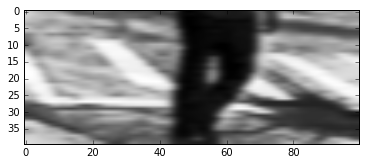

In [58]:
''' Input (noisy picture) '''
pyplot.imshow(np.reshape(inputs[pic],(40,100)), pyplot.cm.gray)
pyplot.show()

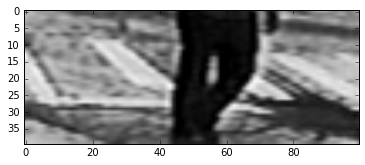

In [59]:
''' view these predictions... '''
pyplot.imshow(np.reshape(pred[pic],(40,100)), pyplot.cm.gray)
pyplot.show()

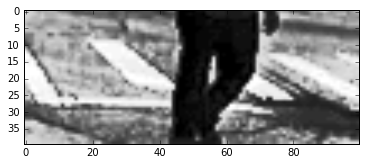

In [60]:
''' TRUE '''
pyplot.imshow(np.reshape(targets[pic],(40,100)), pyplot.cm.gray)
pyplot.show()